# Poisson Flow Generative Models (PFGM)

Main idea: 
- interpret N-dim data as an electric charges, than data distribution is a charge density and direction to that data from another points of N-dim space is an electric field lines
- let's zoom out and draw an N-dim sphere around that charges, then electric field density on the surface of that sphere will be distributed uniformly because of the huge distance from that surface to the charges

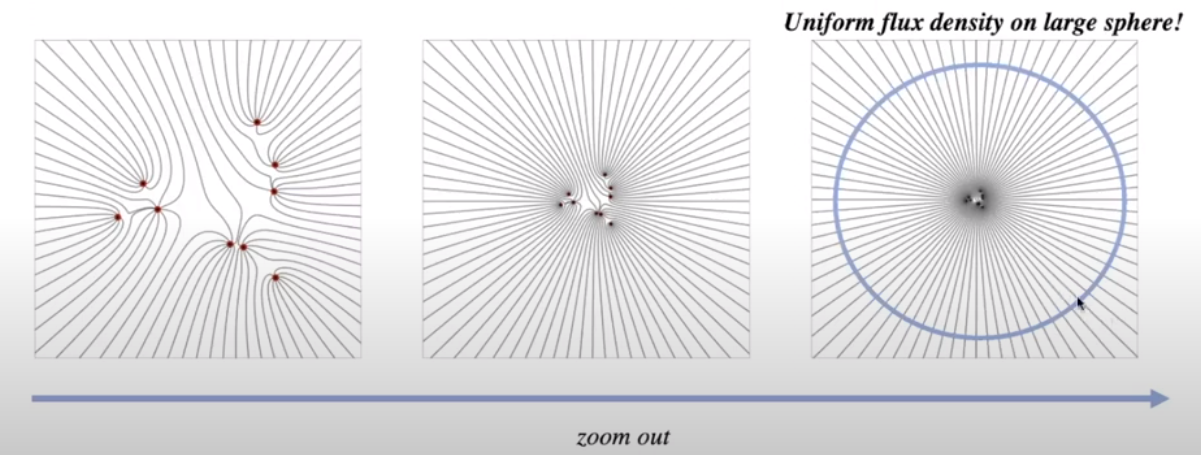

- but if we try to take point on the sphere's surface and move along the electric lines to the charges - we always end up in the center of the sphere => mode collapse, not good

- let's add one more dimension Z, place charges on the Z=0 hyperplane in an N+1-dim space

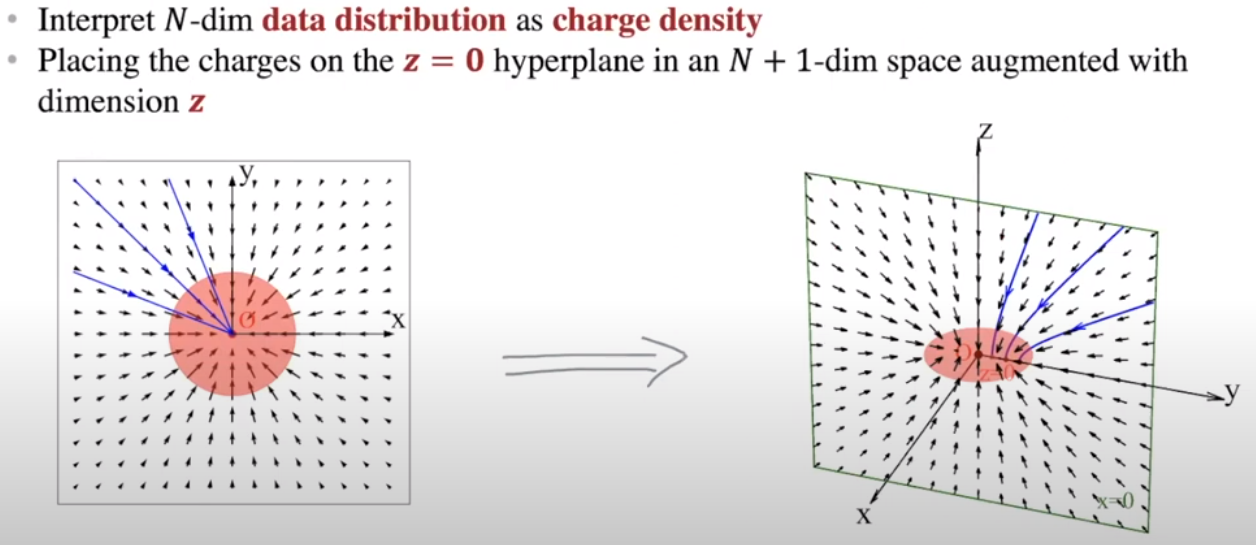

- now we take point from the hemisphere surface with Z > 0 and move along the electric field lines until we reach Z = 0

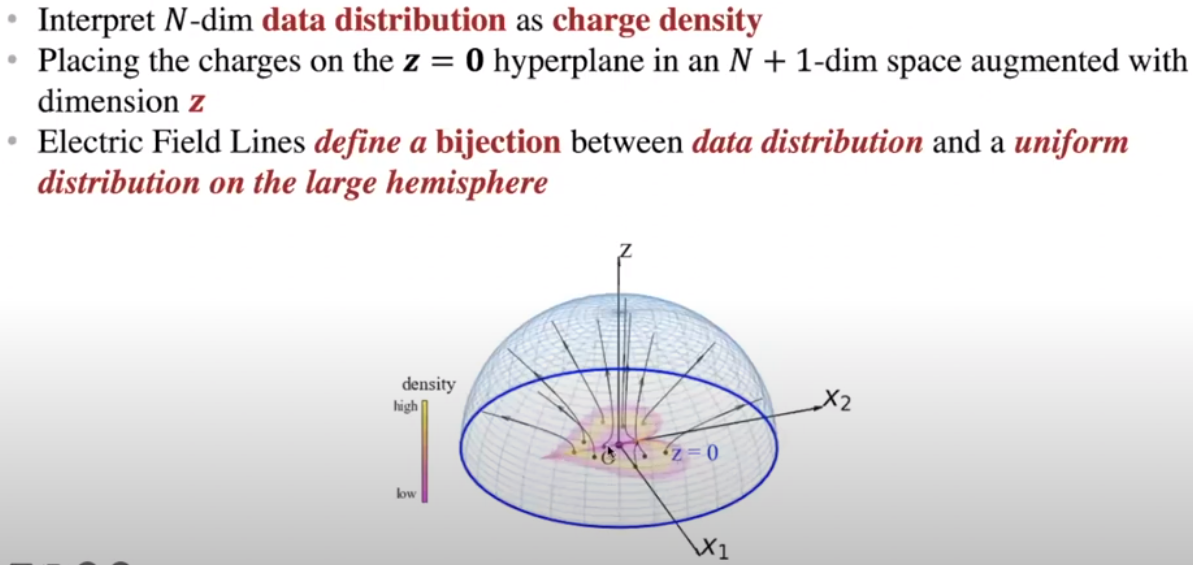

### Generation:

- uniformly sample an initial sample on the hemisphere

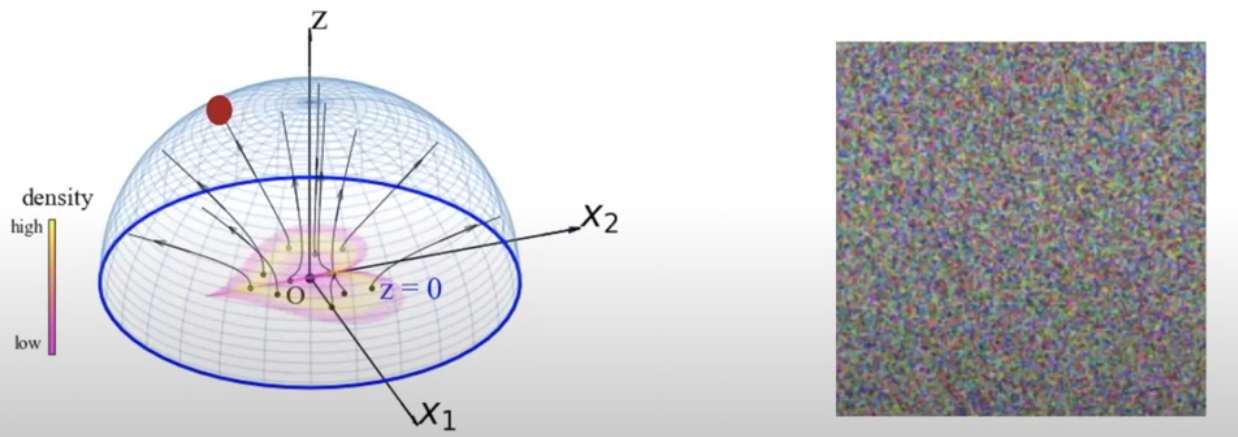

- evolve the sample by following the corresponding electric field line

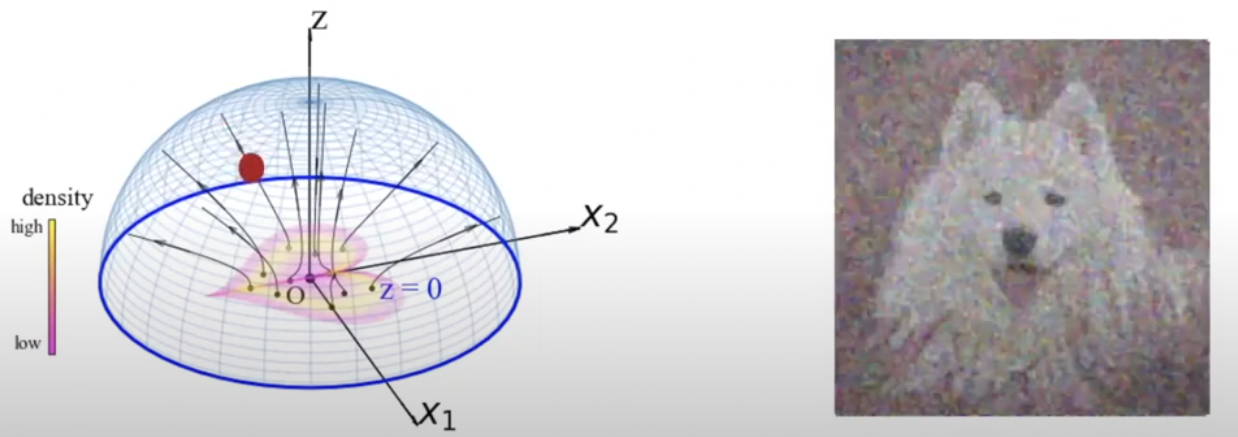

- stop the process when Z = 0

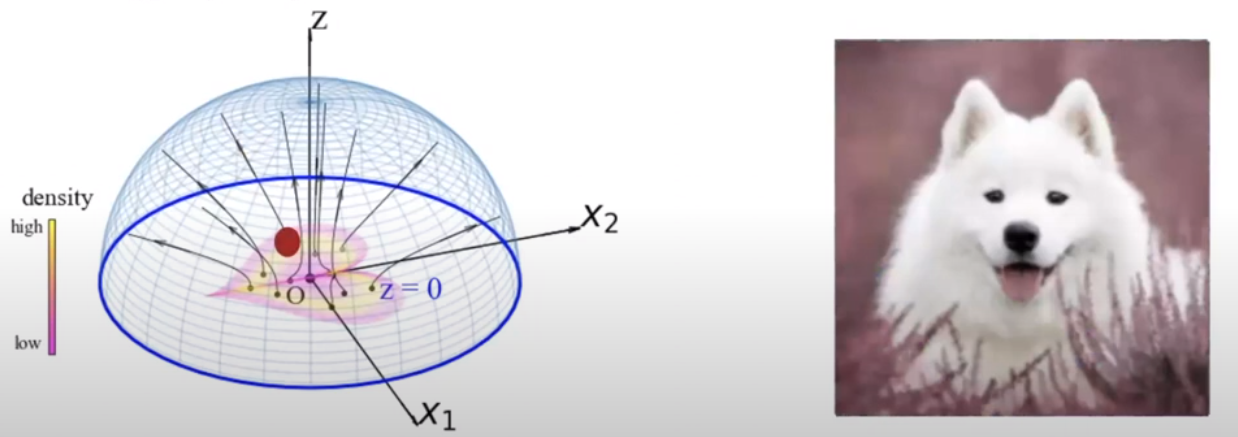

### Technical approach

- Goal: model N-dim data distribution p(x). 
- Augment the N-dim space with Z dim, i.e. x<sup>~</sup> = (x, z)
- Augment the training data x ~ p(x) with z = 0 => p<sup>~</sup>(x<sup>~</sup>) = p(x)δ(z) - placing the training data on z = 0 hyperplane
- Poisson Equation: 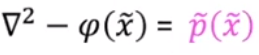, where - φ - is the **potential function** of the electric field
- Electric field looks like: 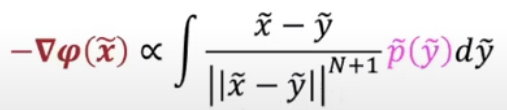, when N = 3, 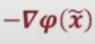 describes the electric force in real world
- trajectories of electric field lines: 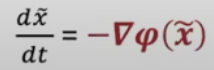

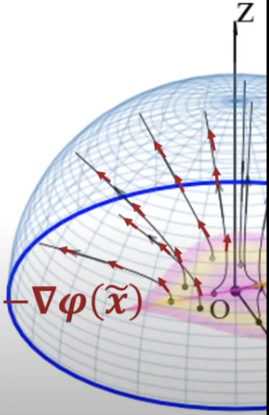

### Estimate the electric field by neural network

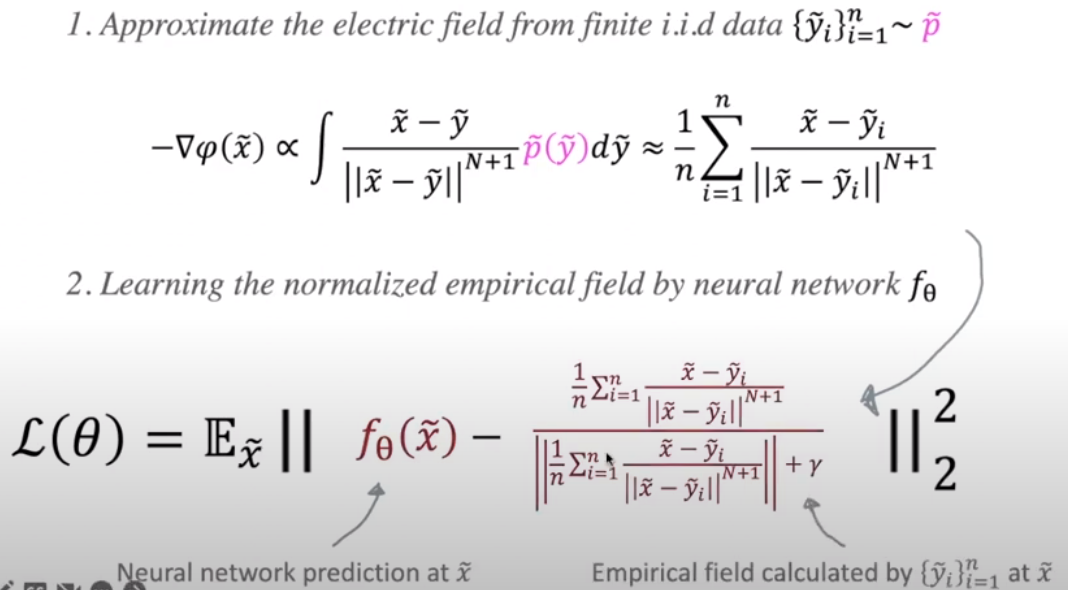

So, we use L2 loss to make the result of NN generation f<sub>θ</sub>(x<sup>~</sup>) as close to the real data y<sup>~</sup> as possible

### Sampling process

Main idea: we replace time anchor that was used in diffusion models by process of following the lines of electric field from z=z<sub>max</sub> to z=z<sub>min</sub>, i.e with use z dimension as anchor. ODE means Ordinary Differential Equation (differential equation dependent on only a single independent variable).

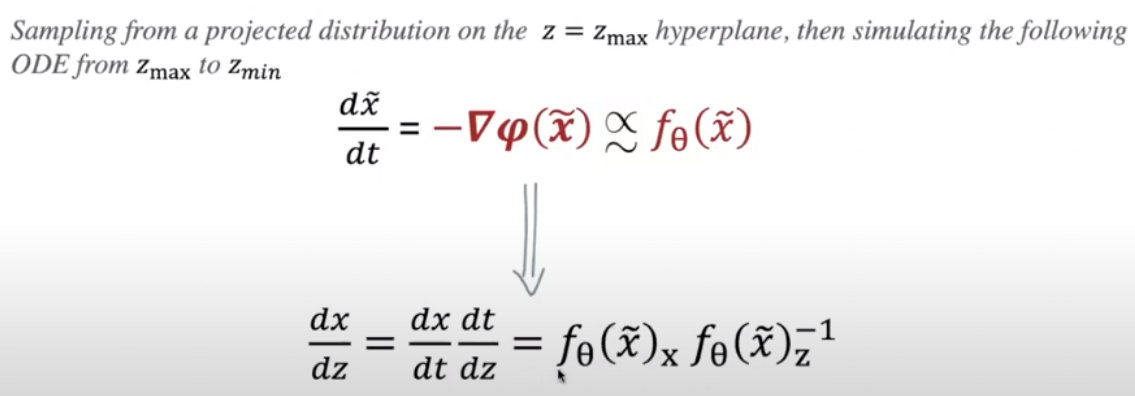

f<sub>θ</sub>(x<sup>~</sup>)<sub>z</sub><sup>-1</sup> - is a scalar value

### Results

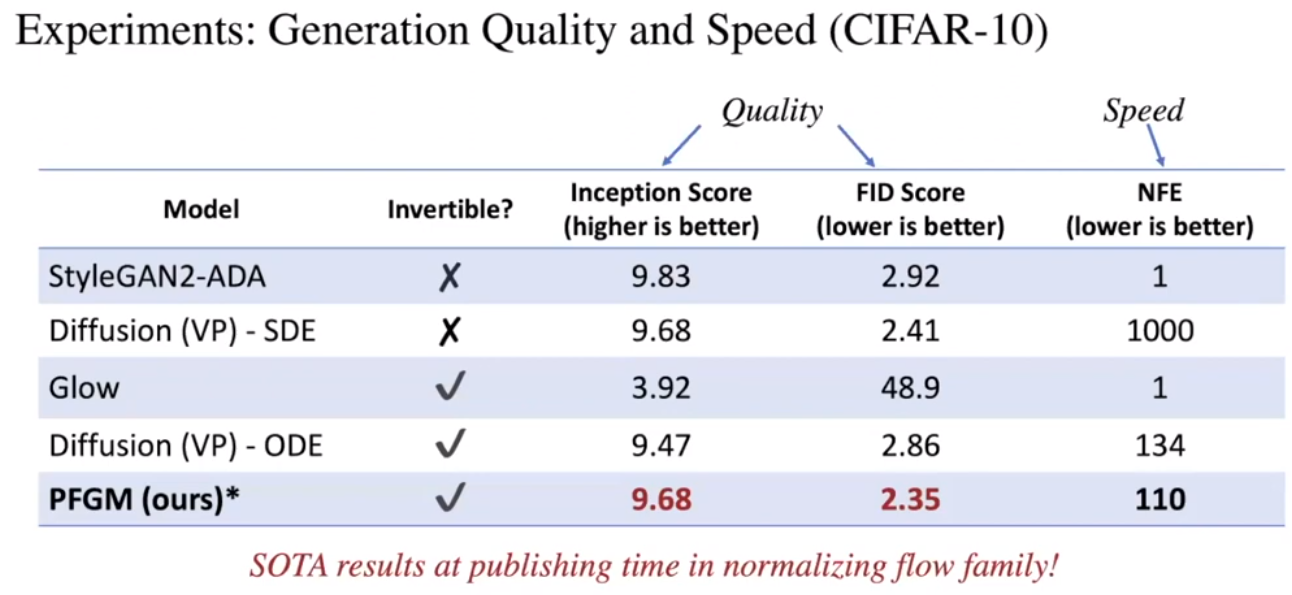

# PFGM++

PFGM is the **only** ODE-based method that can produce decent samples on a weaker architechture. That mean that NN can have much bigger estimation error, but even though PFGM will continue to produce decent samples. Why is this happening? Because Diffusion models have very narrow object distribution if we get out of distribution of what the model has seen during training (e.g. add some noise during generation) - we end up with noisy output picture. Unlike Diffusion Models, PFGM has more broad distribution. But it's not good too because model has seen too much and this doesn't affect well on output picture quality.

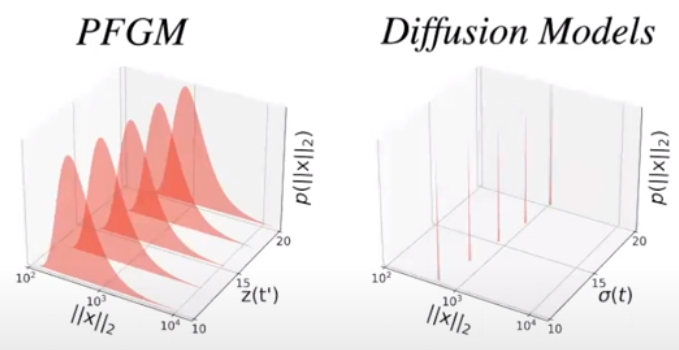

So can we control the width of the distribution and find the perfect balance between too narrow and to wide object distribution?

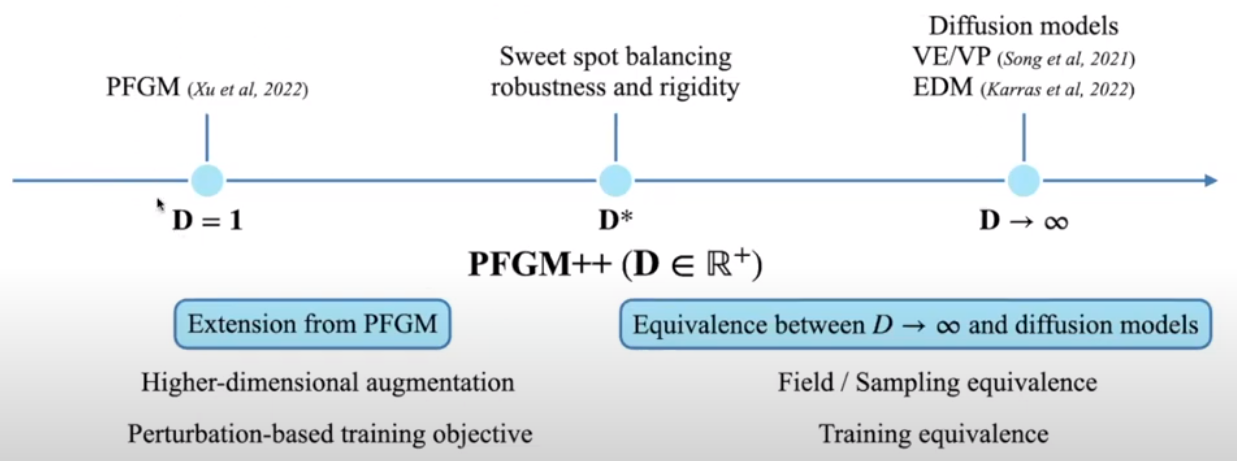

In PFGM++ we just add more dimensions to our N-dim data space and that helps to control object distribution. Number of additional dimensions is D. For D=1 model turns into vanilla PFGM, for D->inf model turns into Diffusion model. So Diffusion model can be represented as an electric field in the infinite-dimensional space. PFGM++ defines a projection to an N-dimensional hypercylinder.

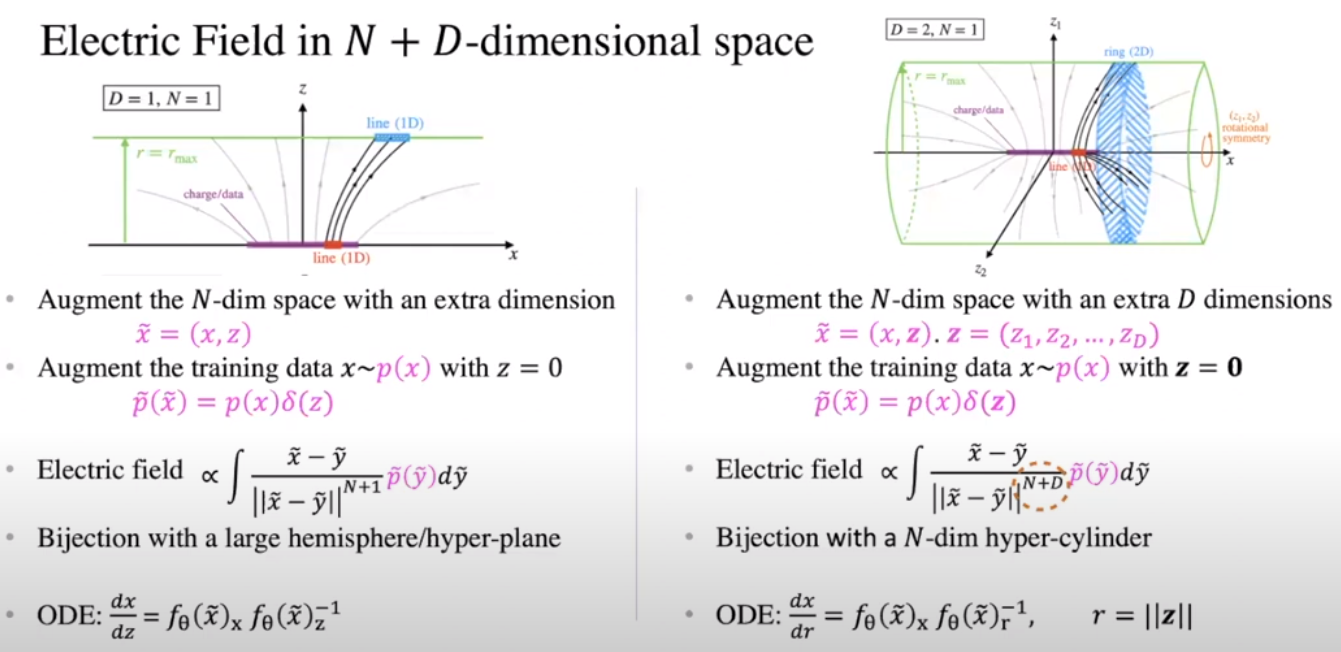

During training, the perturbation kernel p<sub>r</sub>(x|y) is used to sample data and perturb it based on r parameter. Z paramter in PFGM is replaced by *r* parameter in PFGM++ which equals to L2 norm of additional dimensional variables ||(z1, z2, ... z<sub>D</sub>)||<sub>2</sub>. The training objective is compatible with typical conditional generation and degenerates to DM when D -> inf.

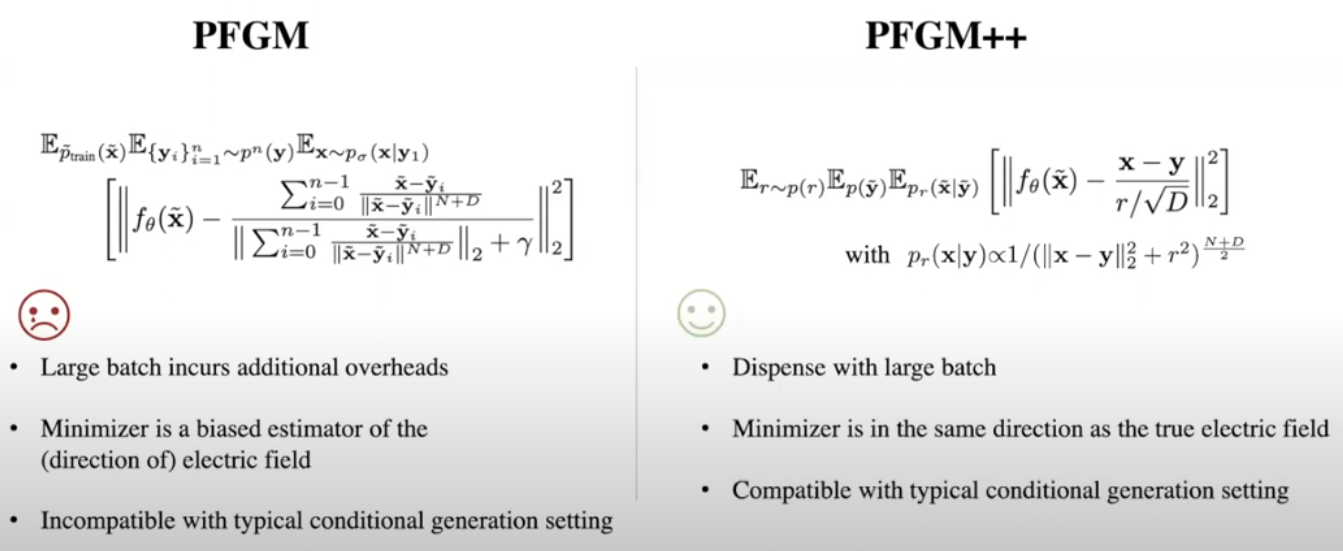

Train process:
 - sample r from D-dimensional space, r deifnes what pertubation / noise kernel to use
 - sample x and y and pertube them with perturbation kernel
 - get x<sup>~</sup> as concatenation (x, z), where z = (z1=0, z2=0, ... z<sub>D</sub>=0)
 - give all this to NN and optimize loss function

### PFGM++ advantages

- balance between robustness (PFGM) and rigidity(DM)
- no need in the huge batches that PFGM needed for an effective training


### Balance Robustness and Rigidity by Controlling D

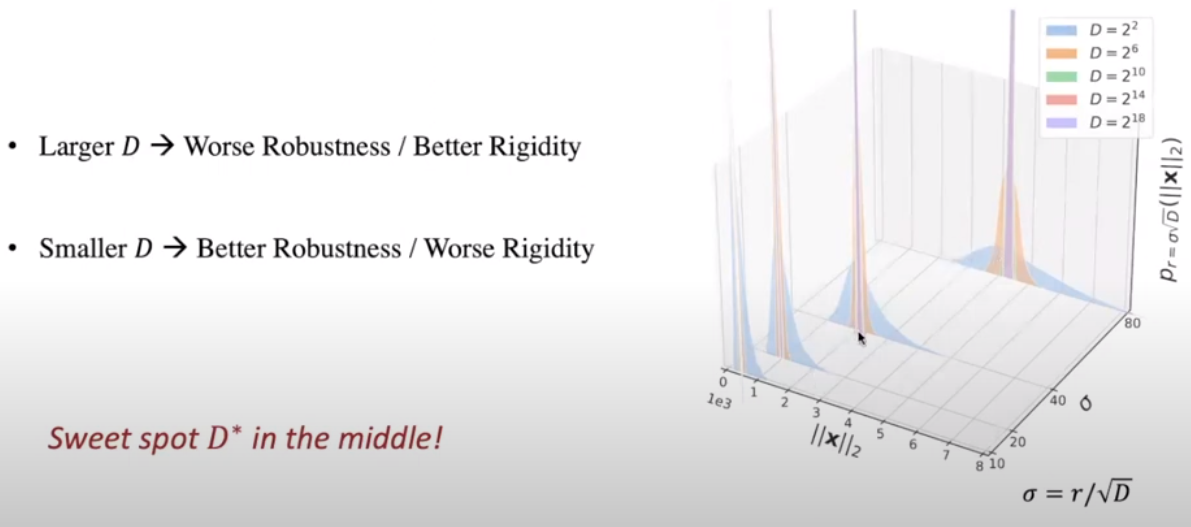

Sweet Spot is situated at value D ~ 2048

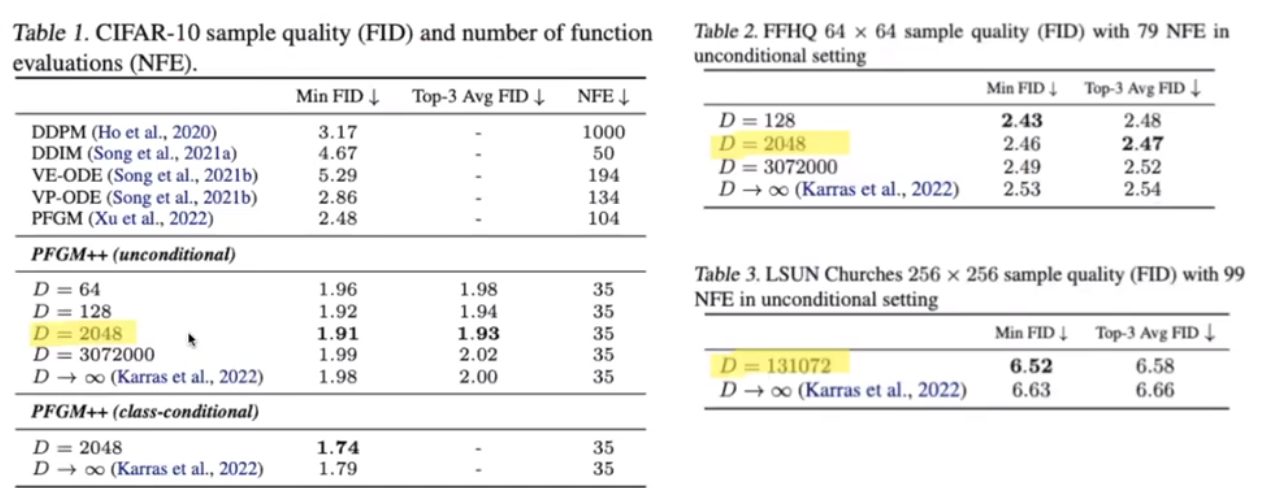

In this experiment some noise was added in sampling process. Models with low D were robust to that noise while models with high D generated noisy pictures.

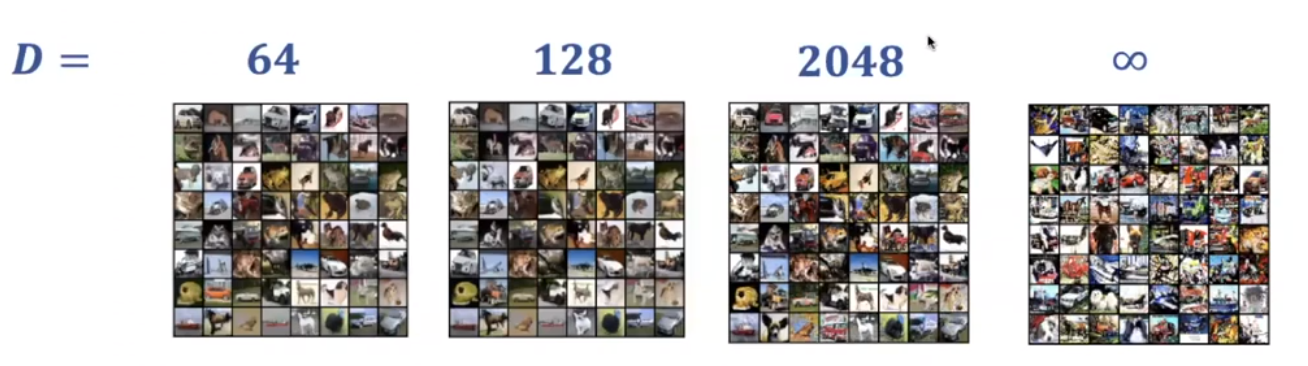

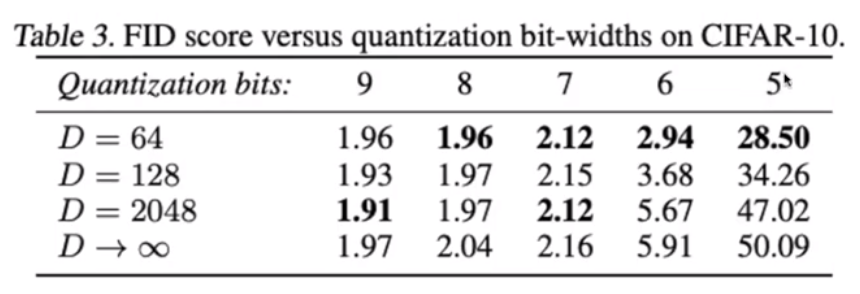

### Summary

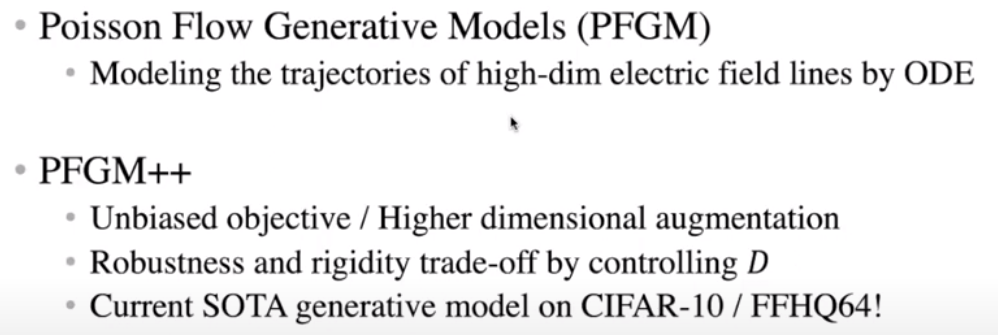
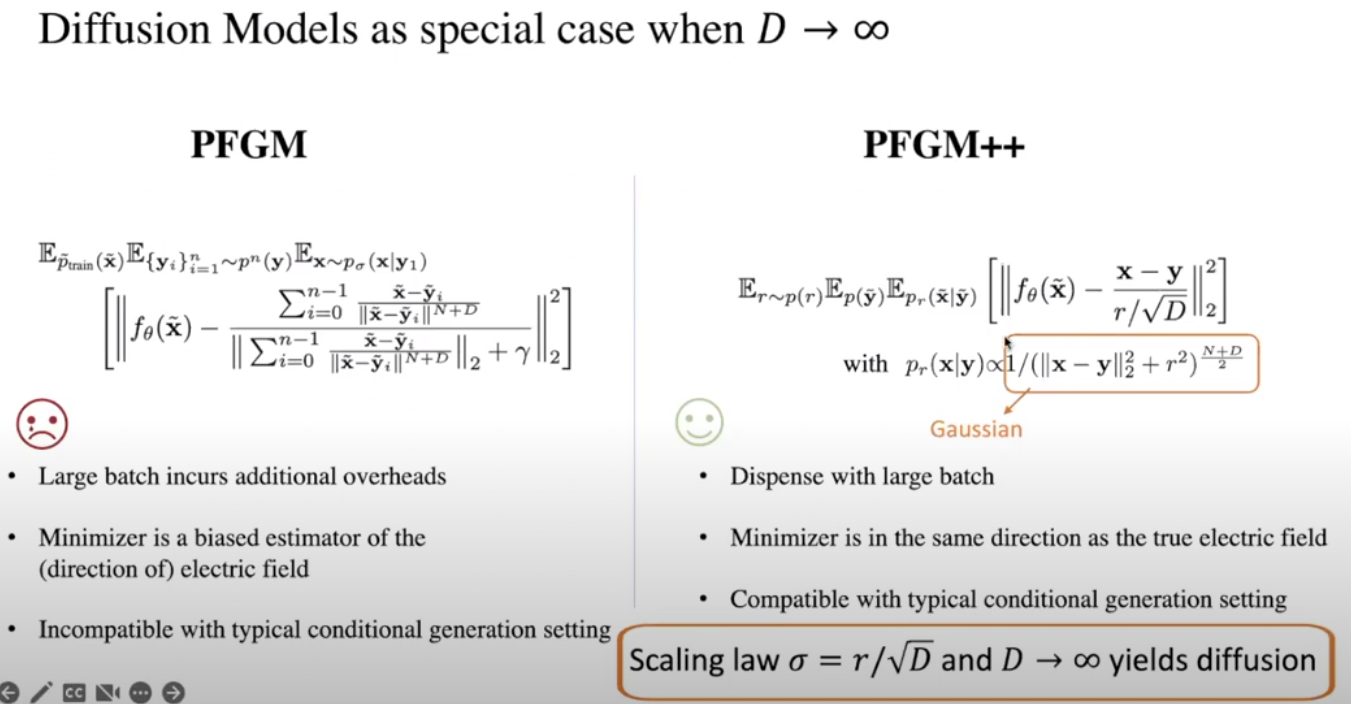